# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 12 Легенда

### Содержание главы

1. Легенда;

2. Легенда на отдельной области рисования.

Когда на рисунке изображено несколько графиков, возникает потребность в их идентификации. Определить, какая линия или диаграмма соответствует каким данным, помогает легенда.

Легенда - это ключ к пониманию сложного графика. Чтобы повысить читаемость рисунка, нужно стараться делать так, чтобы все использованные условные обозначения легко расшифровывались. Немаловажным аспектом этого является правильное размещение и представление легенды.

### Электронные ресурсы:

+ [Пример создания легенды к polar plot](http://matplotlib.org/examples/pylab_examples/polar_legend.html).

### 12.1 Легенда 

Создание легенды подразумевает два логических этапа. 

1. *Формирование подписей к условным обозначениям*;

2. *Отображение легенды на рисунке*.

Самый простой способ сформировать подписи к графическим элементам - использовать атрибут label в графических командах типа `plot()`, `scatter()` и др. Параметр label принимает текст в виде строки, который "привязывается" к породившему их графическому элементу (линия, маркер, диаграмма и т.д.). 

Отображение легенды осуществляется либо методом `plt.legend()` для всего рисунка,  либо `ax.legend()` для конкретной области рисования. Легенда цветовой палитры - цветовая шкала colorbar - рассматривается в следующей главе.

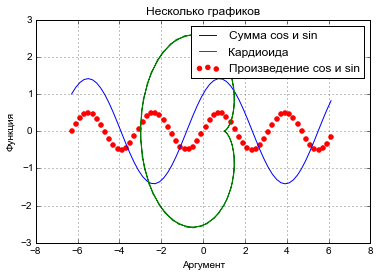

In [2]:
# Пример 12.1.1

import matplotlib.pyplot as plt
import numpy as np

a = 1
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)
xz = a*(2*np.cos(x) - np.cos(2*x))
yz = a*(2*np.sin(x) - np.sin(2*x))

# Способ 1 с помощью label
plt.plot(x, f, label = u'Сумма cos и sin')
plt.scatter(x, y, label = u'Произведение cos и sin', color='r')
plt.plot(xz, yz, label = u'Кардиоида')

plt.grid(True)
plt.xlabel(u'Аргумент')
plt.ylabel(u'Функция')
plt.title(u'Несколько графиков')

plt.legend()   # легенда для всего рисунка fig

save('pic_12_1_1', fmt='png')
save('pic_12_1_1', fmt='pdf')

plt.show()

При создании легенды методом `ax.legend()`, легенда будет отображаться на текущей области рисования `ax`.

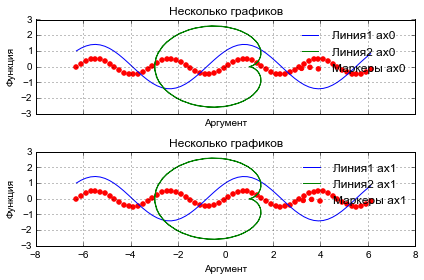

In [3]:
# Пример 12.1.2

import matplotlib.pyplot as plt
import numpy as np

a = 1
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)
xz = a*(2*np.cos(x) - np.cos(2*x))
yz = a*(2*np.sin(x) - np.sin(2*x))

fig = plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

for i,ax in enumerate(fig.axes):
    ax.plot(x, f, label = u'Линия1 ax%d' % i)
    ax.scatter(x, y, label = u'Маркеры ax%d' % i, color='r')
    ax.plot(xz, yz, label = u'Линия2 ax%d' % i)
    ax.grid(True)
    ax.set_xlabel(u'Аргумент')
    ax.set_ylabel(u'Функция')
    ax.set_title(u'Несколько графиков')
    ax.legend(loc='best', frameon=False)   # легенда для области рисования ax

plt.tight_layout()
    
save('pic_12_1_2', fmt='png')
save('pic_12_1_2', fmt='pdf')

plt.show()

Существует и другой способ создания (формирование подписей + отображение на рисунке) легенды.

Можно в самом методе `legend()` указать последовательность(список, кортеж), состоящую из подписей графических элементов. Здесь стоит сказать, что для создания корректной легенды этим методом, нужно знать последовательность появления графических объектов на рисунке. При этом стоит помнить о группировке типов графических объектов (линии к линиям, маркеры к маркерам, диаграммы к диаграммам и т.д.).

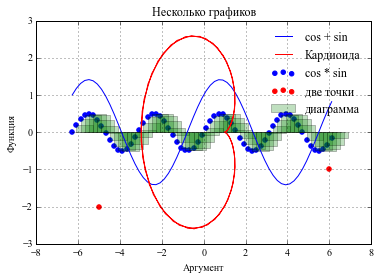

In [4]:
# Пример 12.1.3

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

rcParams['font.family'] = 'Times New Roman', 'Arial', 'Tahoma'
rcParams['font.fantasy'] = 'Times New Roman'

a = 1
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)
xz = a*(2*np.cos(x) - np.cos(2*x))
yz = a*(2*np.sin(x) - np.sin(2*x))

# Способ 2 с помощью label

plt.plot(x, f, 'b')
plt.scatter(x, y, color='b')
plt.bar(x, y, color='g', alpha=0.25)
plt.plot(xz, yz, 'r')
plt.scatter([-5.,6], [-2., -1], color='r')

plt.grid(True)
plt.xlabel(u'Аргумент')
plt.ylabel(u'Функция')
plt.title(u'Несколько графиков')

lab1 = u'cos + sin'
lab2 = u'cos * sin'
lab2_5 = u'диаграмма'
lab3 = u'Кардиоида'
lab4 = u'две точки'

plt.legend((lab1, lab3, lab2, lab4, lab2_5), frameon=False)

save('pic_12_1_3', fmt='png')
save('pic_12_1_3', fmt='pdf')

plt.show()

> Обратите внимание, что если легенда объединяет несколько типов графических элементов (`plot()`, `scatter()`, `bar()`), то они будут группироваться: сначала линии, потом маркеры, потом диаграммы. При использовании метода прямой передачи подписей для создания легенды следует быть особенно внимательным, так как иначе подписи могут быть приписаны не к тем графическим элементам.

Расположение легенды определяется параметром loc, который принимает значения в виде цифр (1-9), начиная от верхнего левого угла и заканчивая нижним правым, и в виде условных обозначений. Значение loc='best' автоматически выберет место на рисунке, где легенда меньше всего будет "портить" график. Также можно убрать рамку вокруг легенды для уменьшения места (frameon=False), занимаемого легендой, снижая тем самым геометрическое давление рисунка в целом.

### 12.2 Легенда на отдельной области рисования

Для мультиоконных рисунков или графиков с несколькими областями рисования, общая легенда может быть размещена как на одной из существующих областей рисования (см. главу "Особенности координатных осей"), так и на отдельной области рисования.

Обратите внимание, что новая область рисования для размещения легенды должна быть вписана в существующий рисунок figure. Это значит, что на рисунке необходимо выделить дополнительное место для легенды, помимо существующих на рисунке областей рисования типа subplots или axes ("мультиокна"). Изменить размеры объединённой области рисования для subplots и axes можно с помощью параметров rcParams:

+ `rcParams['figure.subplot.left'] = 0.125`

+ `rcParams['figure.subplot.right'] = 0.9`

+ `rcParams['figure.subplot.bottom'] = 0.125`

+ `rcParams['figure.subplot.top'] = 0.9`

+ `rcParams['figure.subplot.hspace'] = 0.2`

+ `rcParams['figure.subplot.wspace'] = 0.2`

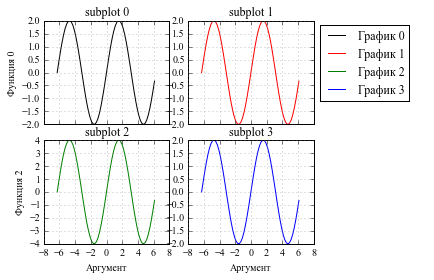

In [7]:
# Пример 12.2.1

from random import randint, choice

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

# Обрати внимание!
rborder = 0.75
rcParams['figure.subplot.right'] = rborder
rcParams['figure.subplot.hspace'] = 0.15
rcParams['figure.subplot.wspace'] = 0.15

lns = []
for i, ax in enumerate(fig.axes):
    
    y = np.sin(x)*randint(1, 5)
    line = ax.plot(x, y, label = u'График %d' % i, color=choice(['r','b','k','g']))
    if i > 1:
        ax.set_xlabel(u'Аргумент')
    if i%2 == 0:
        ax.set_ylabel(u'Функция %d' % i)
    ax.grid(True, color='grey')
    ax.set_title(u'subplot %d' % i)
    lns = lns + line

ax2 = fig.add_axes([rborder, 0.6, 1.-rborder, 0.15], frameon=False, axisbg='w')
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=3, frameon=True)

# Скрываем координатные оси
ax2.set_axis_off()

save('pic_12_2_1', fmt='png')
save('pic_12_2_1', fmt='pdf')

plt.show()

В случае, скажем, столбчатых диаграмм (метод `bar()`), схема работы с легендой аналогичная.

Обратите внимание, что методы типа bar возвращают не графический примитив (плоская линия в случае метода `ax.plot()`), а контейнер, то есть "ящик", в котором хранятся графические примитивы. Поэтому нельзя использовать простое сложение объектов, как было показано в примере с линиями. Как вариант можно использовать метод списков `append()`.

0 Тип данных bar <class 'matplotlib.container.BarContainer'> <Container object of 63 artists>
1 Тип данных bar <class 'matplotlib.container.BarContainer'> <Container object of 63 artists>
2 Тип данных bar <class 'matplotlib.container.BarContainer'> <Container object of 63 artists>
3 Тип данных bar <class 'matplotlib.container.BarContainer'> <Container object of 63 artists>


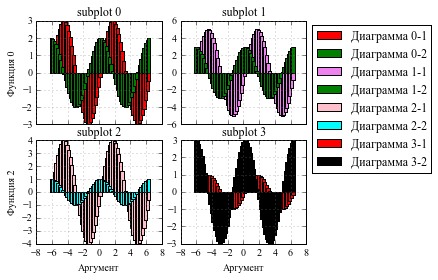

In [8]:
# Пример 12.2.2

from random import randint, choice

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

# Обрати внимание!
rborder = 0.75
rcParams['figure.subplot.right'] = rborder
rcParams['figure.subplot.hspace'] = 0.15
rcParams['figure.subplot.wspace'] = 0.15

lns = []
for i, ax in enumerate(fig.axes):
    
    y = np.sin(x)*randint(1, 5)
    z = np.cos(x)*randint(1, 5)
    
    bar1 = ax.bar(x, y, width=0.4, label = u'Диаграмма %d-1' % i, color=choice(['r','b','pink','violet']))
    
    print '%d Тип данных bar' % i, type(bar1), bar1
    bar2 = ax.bar(x, z, width=0.4, label = u'Диаграмма %d-2' % i, color=choice(['k','g','w','cyan']))

    if i > 1:
        ax.set_xlabel(u'Аргумент')
    if i%2 == 0:
        ax.set_ylabel(u'Функция %d' % i)
    ax.grid(True, color='grey')
    ax.set_title(u'subplot %d' % i)

    # Сравни с предыдущим примером
    lns.append(bar1)
    lns.append(bar2)
    
ax2 = fig.add_axes([rborder, 0.35, 1.-rborder, 0.5], frameon=False, axisbg='w')
#lns
#print type(lns), type(lns[0]), lns[0] 

labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=3, frameon=True)

# Скрываем координатные оси области рисования ax2
ax2.set_axis_off()

save('pic_12_2_2', fmt='png')
save('pic_12_2_2', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

> + [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)